# **Implementación de Newton Raphson para encontrar todos los máximos y mínimos de una función**
**Facultad de ingeniería**

Departamento de Ingeniería de Sistemas y computación

Universidad de los Andes

**ISIS-3302:** Modelado, Simulación y Optimización


**Nombres de los integrantes**


1.   Daniel Felipe Diaz Moreno
2.   Sara Sofía Cárdenas Rodríguez

**Número del grupo**

15


Importación de librerias

In [262]:
!pip install sympy
from sympy import symbols, Eq, latex, diff

# Para mostrar ecuaciones en formato LaTeX
from IPython.display import display, Math

# Para mostrar gráficas
import matplotlib.pyplot as plt
import numpy as np

# Para obtener números aleatorios para RGB
from random import randint

In [263]:
def f(x):
    return x**5 - 8*x**3 + 10*x + 6

x, y = symbols('x y')
display(Math(latex(Eq(y, f(x)))))

<IPython.core.display.Math object>

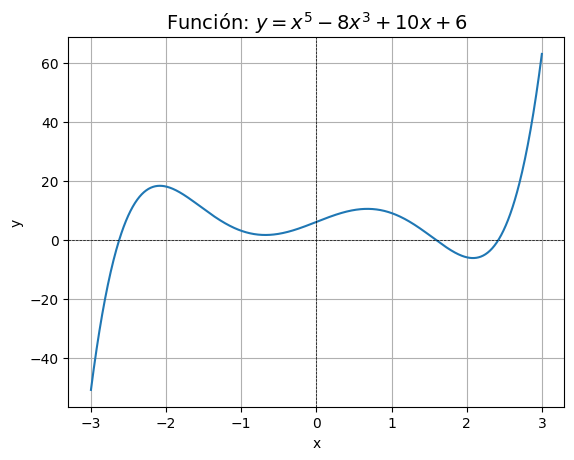

In [264]:

def graficarFuncionYPuntos(funcion, valoresDeX = []):
    valoresEnX = np.linspace(-3, 3, 800)
    valoresEnY = np.array([f(x) for x in valoresEnX])

    plt.plot(valoresEnX, valoresEnY)
    plt.title(f'Función: ${latex(Eq(y, f(x)))}$', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid()

    for i, valorDeX in enumerate(valoresDeX):
        color = (0,0,0)
        if i == 0 or i == len(valoresDeX) - 1:
            color = (1,0,0)
        valorDeY = funcion(valorDeX)
        plt.plot(valorDeX, valorDeY, 'o', color=color, label=f'Punto ({valorDeX:.2f}, {valorDeY:.2f})')

    if valoresDeX:
        plt.legend()
    plt.show()

graficarFuncionYPuntos(f)

In [265]:
def derivada(f, valorDeX):
    return diff(f).subs(x, valorDeX)

def segundaDerivada(f, valorDeX):
    return diff(diff(f)).subs(x, valorDeX)

def newtonRaphson(f, x_0, a):
    i = 0
    valoresX = [x_0]
    convergencia=0.001
    while abs(derivada(f, valoresX[i])) > convergencia:
        valoresX.append(valoresX[i] - a * (derivada(f, valoresX[i]) / segundaDerivada(f, valoresX[i])))
        i += 1
    x_gorro = valoresX[-1]
    return x_gorro

In [266]:
valoresInicialesDeX = np.linspace(-3, 3, 30)
valoresCriticos = []
for valorDeX in valoresInicialesDeX:
    xEncontrado = newtonRaphson(f(x), valorDeX, 0.2)
    puntoInflexion = (xEncontrado, f(xEncontrado))
    valoresCriticos.append(xEncontrado)
    print(f'Un punto de inflexión es: {puntoInflexion}')
    print(f'Un punto de inflexión es aproximadamente: x = {puntoInflexion[0]:.2f}, y = {puntoInflexion[1]:.2f}')
    print()

Un punto de inflexión es: (-2.08305506630326, 18.2587763666106)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08305469023683, 18.2587763669437)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08305559679424, 18.2587763661213)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08305418843691, 18.2587763673705)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08305486747644, 18.2587763667882)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08303371092262, 18.2587763674314)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08303242479448, 18.2587763663047)
Un punto de inflexión es aproximadamente: x = -2.08, y = 18.26

Un punto de inflexión es: (-2.08305526185286, 18.2587763664329)
Un punto de inflexión es aproximadamente

In [267]:
valoresCriticosSinRepetidos = []
puntosDeInflexion = []
tolerancia = 0.001
for critico1 in valoresCriticos:
    if not any(abs(critico1 - critico2) < tolerancia for critico2 in valoresCriticosSinRepetidos ):
        valoresCriticosSinRepetidos.append(critico1)
        puntosDeInflexion.append((critico1, f(critico1)))
        
puntosDeInflexion.sort(key=lambda x: x[1])
puntosAGraficar = [punto[0] for punto in puntosDeInflexion]
print(f'Los valores de x a graficar son: {puntosAGraficar}')

Los valores de x a graficar son: [2.08305526185286, -0.678948909445893, 0.678883311875184, -2.08305506630326]


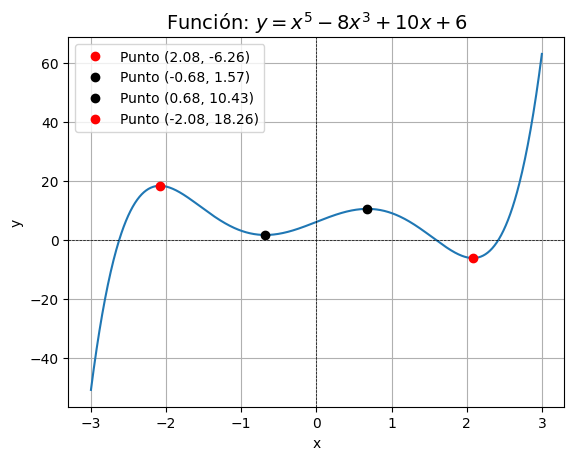

In [268]:
graficarFuncionYPuntos(f, puntosAGraficar)